### `Business Objective:`

- A Chinese automobile company <font color = Blue>**Geely Auto**</font> aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

- They want to <font color = Blue>**understand the factors**</font> on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market.

- Based on the important driving factors the company wants to <font color = Blue>**manipulate the design of the cars**</font>, the <font color = Blue>**business strategy**</font> and make informed business decision related to <font color = Blue>**pricing**</font> their cars in american market.

### `Analytical Objective:`
- Build a <font color = Blue>**multiple linear regression model**</font> for the prediction of car prices using available data.
- Identify which variables are <font color = Blue>**significant**</font> in predicting the price of a car.
- Understand how well those variables describe the price of a car. 

The model will be a good way for management to understand the pricing dynamics of a new market. 

### `Modelling Approach:`
1. Reading the data for modeling
2. Understanding the data
3. Data preparation & EDA
4. Creating train & test sets for modelling
5. Feature selection & modelling
6. Residual analysis & model interpretation
7. Making predictions on test data
8. Model evaluation
9. Summarising driving factors for pricing dynamics  

#### Step 1: Reading the data for modelling

In [416]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [417]:
#Load required modules and libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

In [425]:
#Load the data
pricing_data_df = pd.read_csv('CarPrice_Assignment.csv',sep=",",engine='python')

#### Step 2: Understanding the data

In [426]:
#Check number of rows and columns in the loaded data
print('There are',pricing_data_df.shape[0],'records and',pricing_data_df.shape[1],'variables in the data available for modeling.')

There are 205 records and 26 variables in the data available for modeling.


**Assumption**: We will consider available volume of data points as sufficient for modeling and won't look into any methods to increase the number of datapoints. 

In [427]:
#Understanding the structure and data types of columns in pricing_data_df
pricing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are **no missing values** in any of the variables.

In [428]:
#Looking at top entries to confirm if data is loaded properly
pricing_data_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Step 3: Data preparation & EDA

#### Standardise column names

In [429]:
#Convert all columns names to lower case
pricing_data_df.columns = pricing_data_df.columns.str.lower()
pricing_data_df.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### Check if any columns are no variance columns

In [430]:
#Count the number of unique values in each variable of pricing_data_df
unique_values_df = pd.DataFrame(pricing_data_df.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

#View the unique_values_df
unique_values_df.head()

,variable,unique_value_count
4,aspiration,2
5,doornumber,2
8,enginelocation,2
3,fueltype,2
7,drivewheel,3


There are **no variables with just one value for all records**. Thus, We will not drop any such columns from modelling scope.

#### Derive new variable carcompany from carname

In [431]:
#Replace hypen with space in carcompany variable
pricing_data_df['carname'] = pricing_data_df['carname'].str.replace('-',' ')

#View if replacement was successful
pricing_data_df.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [432]:
#Create carcompany variable from carname variable
pricing_data_df['carcompany'] = pricing_data_df.carname.str.split(' ').str[0]

#Check if the column is created as expeccted 
pricing_data_df.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [433]:
#Check the unique values in the carcompany variable
pricing_data_df.carcompany.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

**Observations**: The values within carcompany variable needs certain level standardisation like converting to lower case and syncing up company names with different nomenclature e.g. porsche' &'porcshce'. 

In [434]:
#Lower case all values of carcompany variable
pricing_data_df['carcompany'] = pricing_data_df['carcompany'].str.lower()

#Check if the update was successful
pricing_data_df.carcompany.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen',
       'vw', 'volvo'], dtype=object)

In [435]:
#Standardise carcompany names
pricing_data_df.replace({'carcompany' : {'maxda' : 'mazda',
                                         'porcshce' : 'porsche',
                                         'toyouta' : 'toyota',
                                         'vokswagen' : 'volkswagen',
                                         'vw' : 'volkswagen'}}, inplace = True)

#Check if the standardisation was successful
pricing_data_df.carcompany.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [436]:
#View the data post updates
pricing_data_df.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### Drop variables with minimal value add for modelling (Free text columns/Non useful variables)

In [437]:
#Create a list of minimal value add variables
non_useful_variables = ['car_id','carname']

print('There were',pricing_data_df.shape[0],'records and',pricing_data_df.shape[1],'variables before dropping variables.')

#Exclude the non_useful_variables from modelling scope
pricing_data_df = pricing_data_df.drop(columns = non_useful_variables)

print('There are',pricing_data_df.shape[0],'records and',pricing_data_df.shape[1],'variables after dropping variables.')

There were 205 records and 27 variables before dropping variables.
There are 205 records and 25 variables after dropping variables.


In [438]:
#Check the revised dimensions of loan_df_subset 
pricing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

#### Quantitative & Qualitative variables check 

In [439]:
#Check which columns are quantitative and which columns are qualitative
all_variables = pricing_data_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(pricing_data_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(set(all_variables) - set(quantitative_variables))

print('Total variables available in pricing_data_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))

Total variables available in pricing_data_df are:  25
Total quantitative variables are:  15
Total qualitative variables are:  10


Check if all qualitative variables are correctly classified as categorical.

In [440]:
#Print all qualitative variables and check if any of them needs to be numeric
qualitative_variables

['carbody',
 'carcompany',
 'enginelocation',
 'drivewheel',
 'fuelsystem',
 'doornumber',
 'cylindernumber',
 'aspiration',
 'fueltype',
 'enginetype']

Qualitative variables are loaded correctly. However, variable '**symboling**' needs to be converted to categorical from numeric.Also, we need to check if the values within the qualitative variables are correct or do they need some correction.

In [441]:
#Check values for symboling
pricing_data_df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [442]:
#Update values of symboling variables to make is categorical
pricing_data_df.replace({'symboling' : {-2 : 'very safe',
                                        -1 : 'pretty safe',
                                         0 : 'safe',
                                         1 : 'little risky',
                                         2 : 'risky',
                                         3 : 'highly risky'}}, inplace = True)

#Check if the standardisation was successful
pricing_data_df.symboling.value_counts()

safe            67
little risky    54
risky           32
highly risky    27
pretty safe     22
very safe        3
Name: symboling, dtype: int64

#### Re-check Quantitative & Qualitative variables

In [443]:
#Check which columns are quantitative and which columns are qualitative
all_variables = pricing_data_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(pricing_data_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(set(all_variables) - set(quantitative_variables))

print('Total variables available in pricing_data_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))

Total variables available in pricing_data_df are:  25
Total quantitative variables are:  14
Total qualitative variables are:  11


#### Exploratory Data Analysis

Analysing the qualitative variables by visualizing them.

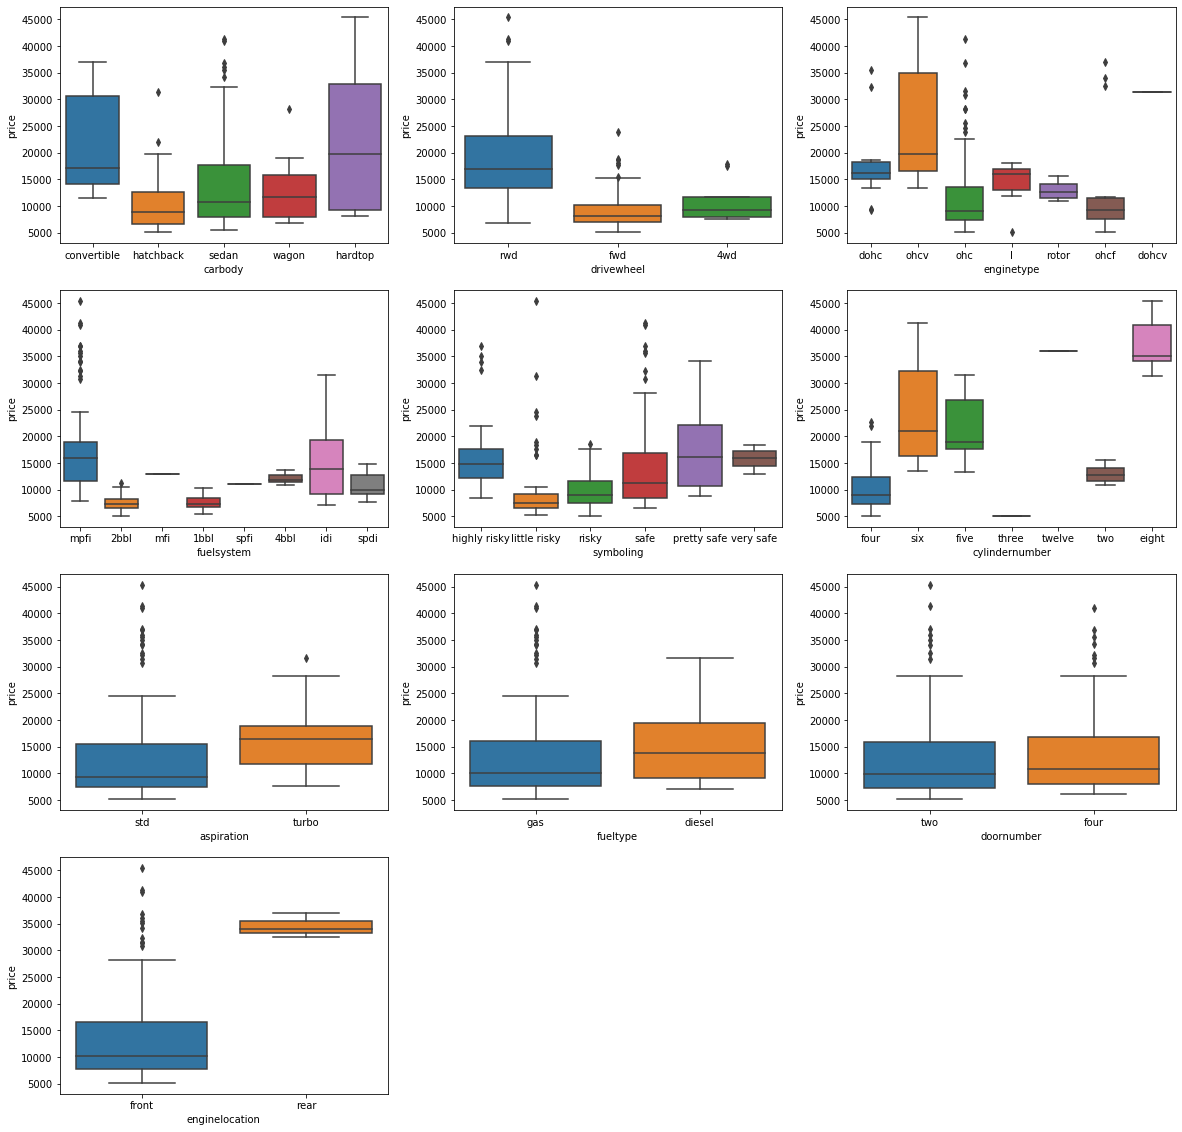

In [444]:
#Create boxplots to view relation between independent and dependent variable
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'carbody', y = 'price', data = pricing_data_df)
plt.subplot(4,3,2)
sns.boxplot(x = 'drivewheel', y = 'price', data = pricing_data_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = pricing_data_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = pricing_data_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'symboling', y = 'price', data = pricing_data_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = pricing_data_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'aspiration', y = 'price', data = pricing_data_df)
plt.subplot(4,3,8)
sns.boxplot(x = 'fueltype', y = 'price', data = pricing_data_df)
plt.subplot(4,3,9)
sns.boxplot(x = 'doornumber', y = 'price', data = pricing_data_df)
plt.subplot(4,3,10)
sns.boxplot(x = 'enginelocation', y = 'price', data = pricing_data_df)

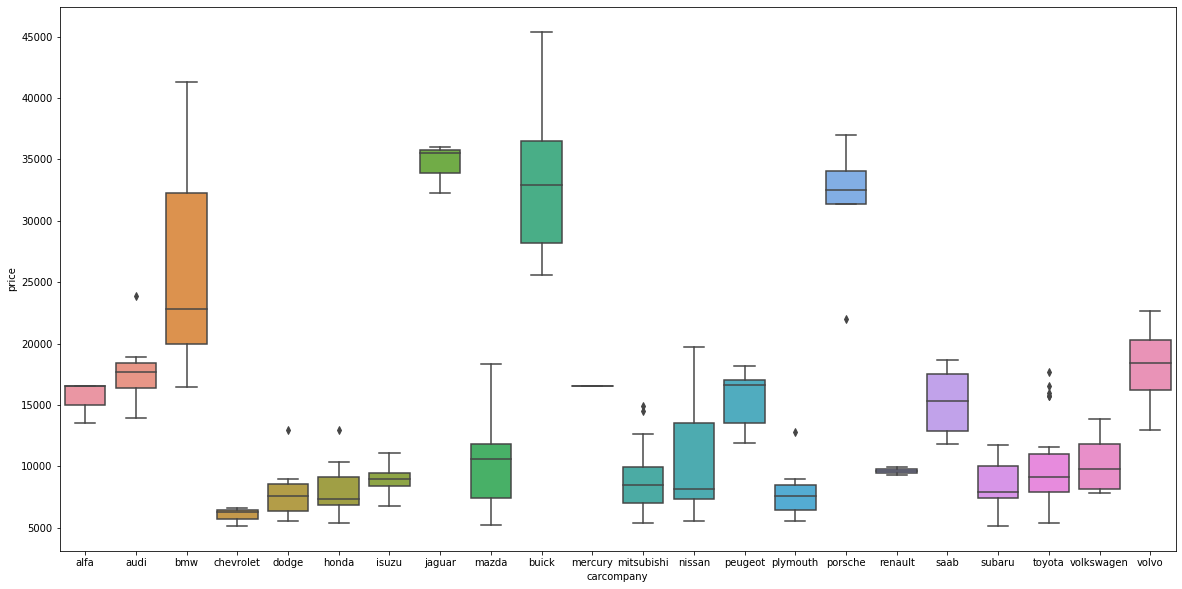

In [445]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'carcompany', y = 'price', data = pricing_data_df)

Some of the key observations from visualizing qualitative variables is as follows:

- Car with six cylinders represnt the average price of car in american market
- The average price of convertables and hardtop cars is more than hactbacks, sedans and wagons
- Most of the cars in american market have engines in front
- Number of doors doesn't impact much on price of the car
- Diesel cars are slightly expensive than cars that run on gas
- Some of the highly risky cars from insurance perspective have price at par with those that are pretty safe
- Engine type ohcv has higher price compared to all engine types and contributes to most of the proportion
- A lot of BMWs are available for analysis compared to other car company

Analysing the quantitative variables by visualizing them.

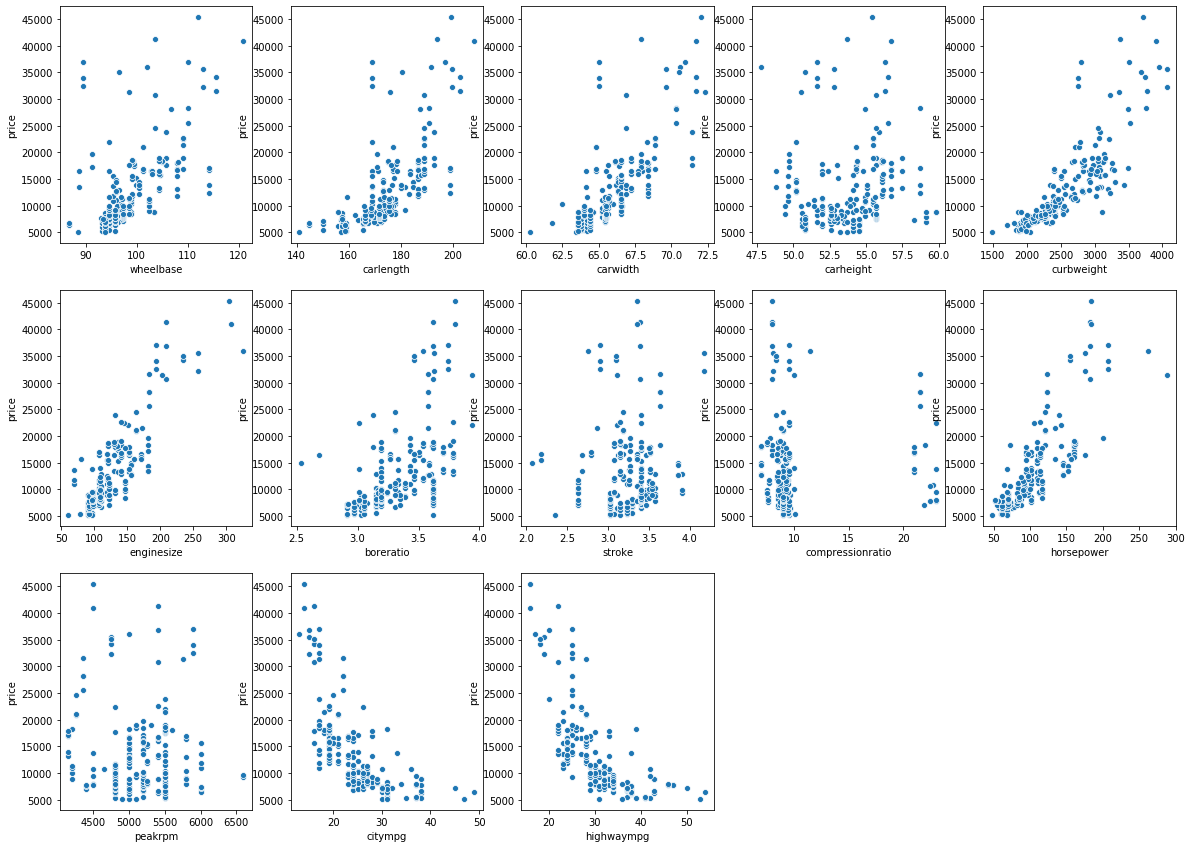

In [446]:
#Create scatter plot to view the relation between independent and dependent variable
plt.figure(figsize=(20, 20))
plt.subplot(4,5,1)
sns.scatterplot(x = 'wheelbase', y = 'price', data = pricing_data_df)
plt.subplot(4,5,2)
sns.scatterplot(x = 'carlength', y = 'price', data = pricing_data_df)
plt.subplot(4,5,3)
sns.scatterplot(x = 'carwidth', y = 'price', data = pricing_data_df)
plt.subplot(4,5,4)
sns.scatterplot(x = 'carheight', y = 'price', data = pricing_data_df)
plt.subplot(4,5,5)
sns.scatterplot(x = 'curbweight', y = 'price', data = pricing_data_df)
plt.subplot(4,5,6)
sns.scatterplot(x = 'enginesize', y = 'price', data = pricing_data_df)
plt.subplot(4,5,7)
sns.scatterplot(x = 'boreratio', y = 'price', data = pricing_data_df)
plt.subplot(4,5,8)
sns.scatterplot(x = 'stroke', y = 'price', data = pricing_data_df)
plt.subplot(4,5,9)
sns.scatterplot(x = 'compressionratio', y = 'price', data = pricing_data_df)
plt.subplot(4,5,10)
sns.scatterplot(x = 'horsepower', y = 'price', data = pricing_data_df)
plt.subplot(4,5,11)
sns.scatterplot(x = 'peakrpm', y = 'price', data = pricing_data_df)
plt.subplot(4,5,12)
sns.scatterplot(x = 'citympg', y = 'price', data = pricing_data_df)
plt.subplot(4,5,13)
sns.scatterplot(x = 'highwaympg', y = 'price', data = pricing_data_df)

Some of the key observations from visualizing quantitative variables is as follows:

- Following variables seem to have positive correlation with price
    - wheelbase
    - carlength
    - carwitdh
    - curbweight
    - enginesize
    - horsepower
    
- The mpg variables seem to have negative correlation with price.

Lets quantify the correlation using a heat map.

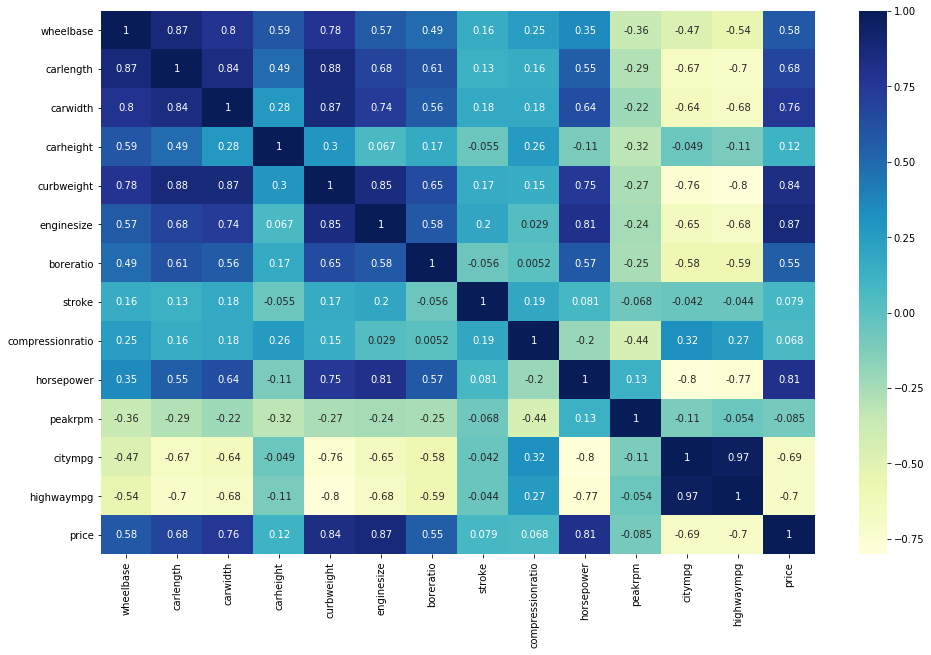

In [447]:
#Create aheatmap of quantitaative variables
plt.figure(figsize = (16, 10))
sns.heatmap(pricing_data_df[quantitative_variables].corr(), annot = True, cmap="YlGnBu")
plt.show()

Following are some of the strongly correlated variables with price:

- enginesize
- carwidth
- curbweight
- horsepower
- citympg
- highwaympg

Following are some of the variables combinations that might cause multicollinearity:

- wheelbase <-> carlength
- wheelbase <-> carwidth
- wheelbase <-> curbweight
- carlength <-> curbweight
- carlength <-> carwidth
- carwidth <-> enginesize
- carwidth <-> curbweight
- curbweight <-> horsepower
- curbweight <-> enginesize
- horsepower <-> enginesize
- horsepower <-> citympg
- horsepower <-> highwaympg
- carlength <-> highwaympg

Basis exploratory data analysis, we understand that certain variable like carcompany, cylindernumber, enginetype, engine 
location, enginesize, horespower, etc. have influence on deciding the car price. Hwoever, many of these independent variable are correlated as well.

So during modelling we might to more than one iterations to arrive at the most optimal model.

#### Anamoly Detection

In [448]:
#List the quantitative variables to check
quantitative_variables

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [449]:
#Set the quantiles for checking influential data points
quantile_list = [0, .25, .5, .75, 1.]
quantile_list

[0, 0.25, 0.5, 0.75, 1.0]

In [450]:
#User define function to compute inter quartile range and find possible outliers
def check_outliers(check_df, check_variable):
    
    #Compute the inter quartile range
    q1 = check_df[check_variable].quantile(0.25)
    q3 = check_df[check_variable].quantile(0.75)
    iqr = q3 - q1
    
    #print('Inter Quartile Range is: ',iqr)

    #Compute the upper and lower cutoff points to identify outliers
    lower_cutoff = q1 - 1.5 * iqr
    if lower_cutoff<0:
        lower_cutoff =0

    upper_cutoff = q3 + 1.5 * iqr

    #print('Lower cutoff for outliers is ',lower_cutoff) 
    #print('Upper cutoff for outliers is ',upper_cutoff)
    
    #Check if outliers exist
    outlier_datapoints = pricing_data_df[check_variable][(pricing_data_df[check_variable] < lower_cutoff )| (pricing_data_df[check_variable] > upper_cutoff)]
    
    #Check if there are possible outliers
    if(len(outlier_datapoints)>=1):
        print('Following are possible outliers for', check_variable, '\n', outlier_datapoints.unique())
    
        #Genearte the quantile values
        quantiles = pricing_data_df[check_variable].quantile(quantile_list)

        #Plot histogram
        fig, ax = plt.subplots()
        pricing_data_df[check_variable].hist(color='#8edeb6', edgecolor='black', grid=False)

        #Plot quantiles over histogram
        for quantile in quantiles:
            bin_cut = plt.axvline(quantile, color='r')
            ax.legend([bin_cut], ['Quantiles'], fontsize=10)

        #Label axis
        title = check_variable +' histogram'
        ax.set_title(title, fontsize=12)
        ax.set_xlabel(check_variable, fontsize=12)
        ax.set_ylabel('frequency', fontsize=12)

        plt.show()
    else:
        print('Not outlier datapoints for',check_variable)
    
    
    #return(outlier_datapoints)

Following are possible outliers for wheelbase 
 [115.6 120.9]


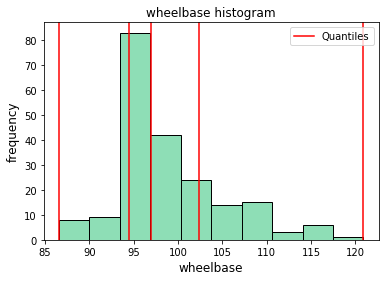

In [451]:
#Find outliers in wheelbase
check_outliers(check_df = pricing_data_df, check_variable = 'wheelbase')

From the distribution of the data we can say that the possible outliers are actually influential data points corresponding to cars with higher curbweight.

Following are possible outliers for carlength 
 [141.1]


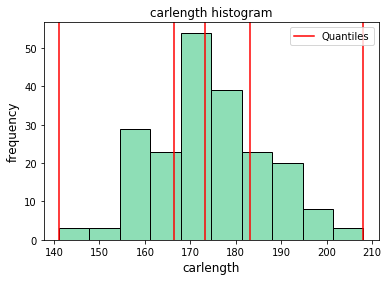

In [452]:
#Find outliers in carlength
check_outliers(check_df = pricing_data_df, check_variable = 'carlength')

From the distribution of the data we can say that the possible outlier is actually an influential data point for a hatchback.

Following are possible outliers for carwidth 
 [71.4 71.7 72.  72.3]


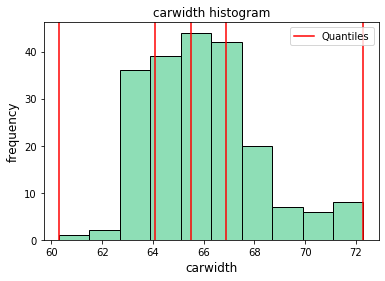

In [453]:
#Find outliers in carwidth
check_outliers(check_df = pricing_data_df, check_variable = 'carwidth')

From the distribution of the data we can say that the possible outliers are actually influential data points corresponding to wider cars.

In [454]:
#Find outliers in carheight
check_outliers(check_df = pricing_data_df, check_variable = 'carheight')

Not outlier datapoints for carheight


In [455]:
#Find outliers in curbweight
check_outliers(check_df = pricing_data_df, check_variable = 'curbweight')

Not outlier datapoints for curbweight


Following are possible outliers for enginesize 
 [209 258 326 234 308 304]


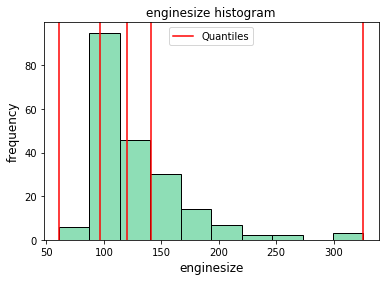

In [456]:
#Find outliers in enginesize
check_outliers(check_df = pricing_data_df, check_variable = 'enginesize')

From the distribution of the data we can say that the possible outliers are actually influential data points corresponding to cars with higher car width and length.

In [457]:
#Find outliers in boreratio
check_outliers(check_df = pricing_data_df, check_variable = 'boreratio')

Not outlier datapoints for boreratio


Following are possible outliers for stroke 
 [3.9  4.17 2.19 2.07 2.36 2.64]


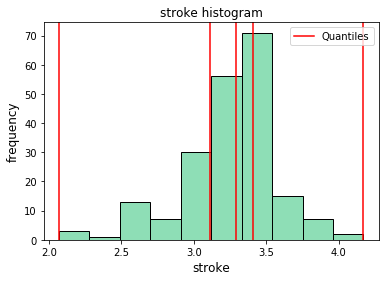

In [458]:
#Find outliers in stroke
check_outliers(check_df = pricing_data_df, check_variable = 'stroke')

From the distribution of the data we can say that the possible outliers are actually influential data points corresponding to cars either with higher price & powerful engine or cars with lower price and commodity engine.

Following are possible outliers for compressionratio 
 [ 7.  11.5 22.7 22.  21.5 21.9 21.  22.5 23. ]


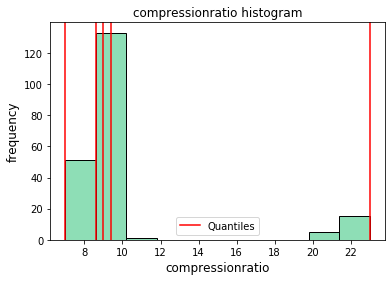

In [459]:
#Find outliers in compressionratio
check_outliers(check_df = pricing_data_df, check_variable = 'compressionratio')

The compressionratio datapoints identified as outliers are actually as per the distribution of the data and would be considered as influential data points.

Following are possible outliers for horsepower 
 [262 200 207 288]


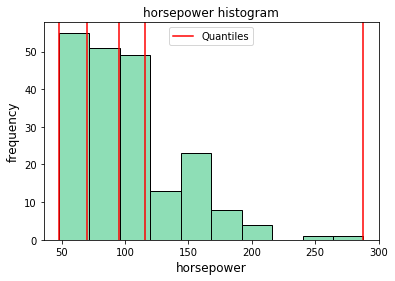

In [460]:
#Find outliers in horsepower
check_outliers(check_df = pricing_data_df, check_variable = 'horsepower')

The possible outliers are actually valid datapoints corresponding to cars with high power.

Following are possible outliers for peakrpm 
 [6600]


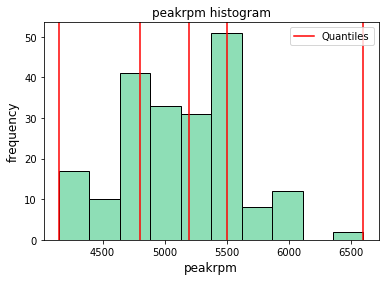

In [461]:
#Find outliers in peakrpm
check_outliers(check_df = pricing_data_df, check_variable = 'peakrpm')

The possible outlier is actually valid datapoint corresponding to cars with high power.

Following are possible outliers for citympg 
 [47 49]


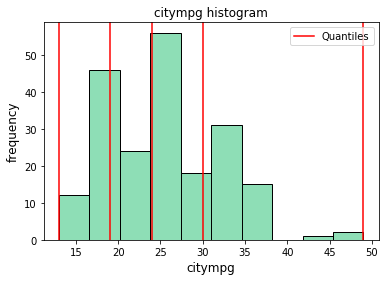

In [462]:
#Find outliers in citympg
check_outliers(check_df = pricing_data_df, check_variable = 'citympg')

The possible outliers are actually valid datapoints corresponding to cars with higher mileage within city.

Following are possible outliers for highwaympg 
 [53 54 50]


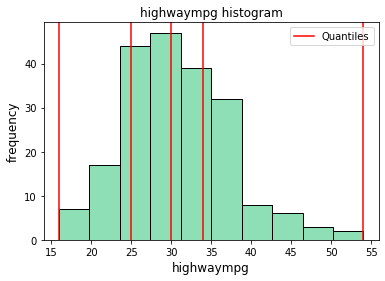

In [463]:
#Find outliers in highwaympg
check_outliers(check_df = pricing_data_df, check_variable = 'highwaympg')

The possible outliers are actually valid datapoints corresponding to cars with higher mileage on highways.

#### Identify which qualitative independent variables need dummy variables creation

In [464]:
#Count the number of unique values in each variable of pricing_data_df
unique_values_df = pd.DataFrame(pricing_data_df.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

#Filter qualitative variables which need simple transformation
transform_variables_df = unique_values_df.loc[(unique_values_df['variable'].isin(qualitative_variables)) & (unique_values_df['unique_value_count']==2),:]

#Filter qualitative variables which need dummy variable creation
dummy_variables_df = unique_values_df.loc[(unique_values_df['variable'].isin(qualitative_variables)) & (unique_values_df['unique_value_count']>2),:]

#### The independent variable needing dummy variables.

In [465]:
dummy_variables_df

,variable,unique_value_count
5,drivewheel,3
4,carbody,5
0,symboling,6
13,cylindernumber,7
12,enginetype,7
15,fuelsystem,8
24,carcompany,22


#### The independent variables which have only two levels and need simple transformation. 

In [466]:
transform_variables_df

,variable,unique_value_count
2,aspiration,2
3,doornumber,2
6,enginelocation,2
1,fueltype,2


#### Create dummy variables for required independnet variables.

In [467]:
#Check distinct values for drivewheel 
pricing_data_df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

For drivewheel standardizing 4wd and fwd will lead to two levels and simple transformation will suffice.

In [468]:
#Standardise drivewheel values
pricing_data_df.replace({'drivewheel' : {'4wd' : 'fwd'}}, inplace = True)

#Check if the standardisation was successful
pricing_data_df.drivewheel.value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

In [469]:
#Transform values for drivewheel
pricing_data_df.replace({'drivewheel' : {'fwd'   : 0,
                                         'rwd'   : 1}}, inplace = True)

#Check if the transformation was successful
pricing_data_df.drivewheel.value_counts()

0    129
1     76
Name: drivewheel, dtype: int64

In [470]:
#Check distinct values for carbody
pricing_data_df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [471]:
#Create dummy variable for carbody
carbody_dummies = pd.get_dummies(pricing_data_df['carbody'], drop_first = True)
carbody_dummies.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


When all carbody types are zero it indicates a carbody **convertible**.

In [472]:
#Concate the dummy variable with pricing_data_df
pricing_data_df = pd.concat([pricing_data_df, carbody_dummies], axis = 1)

#Check the merged dummy variables
pricing_data_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,horsepower,peakrpm,citympg,highwaympg,price,carcompany,hardtop,hatchback,sedan,wagon
0,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,111,5000,21,27,13495.0,alfa,0,0,0,0
1,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,111,5000,21,27,16500.0,alfa,0,0,0,0
2,little risky,gas,std,two,hatchback,1,front,94.5,171.2,65.5,...,154,5000,19,26,16500.0,alfa,0,1,0,0
3,risky,gas,std,four,sedan,0,front,99.8,176.6,66.2,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,risky,gas,std,four,sedan,0,front,99.4,176.6,66.4,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [473]:
#Check distinct values for symboling
pricing_data_df.symboling.value_counts()

safe            67
little risky    54
risky           32
highly risky    27
pretty safe     22
very safe        3
Name: symboling, dtype: int64

In [474]:
#Create dummy variable for symboling
symboling_dummies = pd.get_dummies(pricing_data_df['symboling'], drop_first = True)
symboling_dummies.head()

,little risky,pretty safe,risky,safe,very safe
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


When all symboling types are zero it indicates a symboling **highly risky**.

In [475]:
#Concate the dummy variable with pricing_data_df
pricing_data_df = pd.concat([pricing_data_df, symboling_dummies], axis = 1)

#Check the merged dummy variables
pricing_data_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,carcompany,hardtop,hatchback,sedan,wagon,little risky,pretty safe,risky,safe,very safe
0,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,alfa,0,0,0,0,0,0,0,0,0
1,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,alfa,0,0,0,0,0,0,0,0,0
2,little risky,gas,std,two,hatchback,1,front,94.5,171.2,65.5,...,alfa,0,1,0,0,1,0,0,0,0
3,risky,gas,std,four,sedan,0,front,99.8,176.6,66.2,...,audi,0,0,1,0,0,0,1,0,0
4,risky,gas,std,four,sedan,0,front,99.4,176.6,66.4,...,audi,0,0,1,0,0,0,1,0,0


In [476]:
#Check distinct values for cylindernumber
pricing_data_df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [477]:
#Create dummy variable for cylindernumber
cylindernumber_dummies = pd.get_dummies(pricing_data_df['cylindernumber'], drop_first = True)
cylindernumber_dummies.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


When all cylindernumber are zero it indicates a cylindernumber **eight**.

In [478]:
#Concate the dummy variables with pricing_data_df
pricing_data_df = pd.concat([pricing_data_df, cylindernumber_dummies], axis = 1)

#Check the merged dummy variables
pricing_data_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,pretty safe,risky,safe,very safe,five,four,six,three,twelve,two
0,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,little risky,gas,std,two,hatchback,1,front,94.5,171.2,65.5,...,0,0,0,0,0,0,1,0,0,0
3,risky,gas,std,four,sedan,0,front,99.8,176.6,66.2,...,0,1,0,0,0,1,0,0,0,0
4,risky,gas,std,four,sedan,0,front,99.4,176.6,66.4,...,0,1,0,0,1,0,0,0,0,0


In [479]:
#Check distinct values for enginetype
pricing_data_df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [480]:
#Create dummy variable for enginetype
enginetype_dummies = pd.get_dummies(pricing_data_df['enginetype'], drop_first = True)
enginetype_dummies.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


When all enginetype are zero it indicates a enginetype **dohc**.

In [481]:
#Concate the dummy variables with pricing_data_df
pricing_data_df = pd.concat([pricing_data_df, enginetype_dummies], axis = 1)

#Check the merged dummy variables
pricing_data_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor
0,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,little risky,gas,std,two,hatchback,1,front,94.5,171.2,65.5,...,1,0,0,0,0,0,0,0,1,0
3,risky,gas,std,four,sedan,0,front,99.8,176.6,66.2,...,0,0,0,0,0,0,1,0,0,0
4,risky,gas,std,four,sedan,0,front,99.4,176.6,66.4,...,0,0,0,0,0,0,1,0,0,0


In [482]:
#Check distinct values for fuelsystem
pricing_data_df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [483]:
#Create dummy variable for fuelsystem
fuelsystem_dummies = pd.get_dummies(pricing_data_df['fuelsystem'], drop_first = True)
fuelsystem_dummies.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


When all fuelsystem are zero it indicates a fuelsystem **1bbl**.

In [484]:
#Concate the dummy variables with pricing_data_df
pricing_data_df = pd.concat([pricing_data_df, fuelsystem_dummies], axis = 1)

#Check the merged dummy variables
pricing_data_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,little risky,gas,std,two,hatchback,1,front,94.5,171.2,65.5,...,0,1,0,0,0,0,0,1,0,0
3,risky,gas,std,four,sedan,0,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,risky,gas,std,four,sedan,0,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [485]:
#Check distinct values for carcompany
pricing_data_df.carcompany.value_counts()

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
subaru        12
volkswagen    12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
alfa           3
jaguar         3
chevrolet      3
renault        2
mercury        1
Name: carcompany, dtype: int64

In [486]:
#Create dummy variable for fuelsystem
carcompany_dummies = pd.get_dummies(pricing_data_df['carcompany'], drop_first = True)
carcompany_dummies.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


When all carcompany are zero it indicates the carcompany **alfa**.

In [487]:
#Concate the dummy variables with pricing_data_df
pricing_data_df = pd.concat([pricing_data_df, carcompany_dummies], axis = 1)

#Check the merged dummy variables
pricing_data_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,highly risky,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,little risky,gas,std,two,hatchback,1,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,risky,gas,std,four,sedan,0,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,risky,gas,std,four,sedan,0,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


Thus, so far we have created dummy variables for following qualitative variables:

1. **carbody** -> 4 dummy variables
2. **symboling** -> 5 dummy variables
3. **cylindernumber** -> 6 dummy variables
4. **enginetype** -> 6 dummy variables
5. **fuelsystem** -> 7 dummy variables
6. **carcompany** -> 21 dummy variables

Now lets transfrom the values of the quantitative variables which have just 2 levels in them.

In [488]:
#Check values for aspiration
pricing_data_df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [489]:
#Transform values for aspiration
pricing_data_df.replace({'aspiration' : {'std'   : 0,
                                         'turbo' : 1}}, inplace = True)

#Check if the transformation was successful
pricing_data_df.aspiration.value_counts()

0    168
1     37
Name: aspiration, dtype: int64

In [490]:
#Check values for doornumber
pricing_data_df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [491]:
#Transform values for doornumber
pricing_data_df.replace({'doornumber' : {'two'   : 0,
                                         'four' : 1}}, inplace = True)

#Check if the transformation was successful
pricing_data_df.doornumber.value_counts()

1    115
0     90
Name: doornumber, dtype: int64

In [492]:
#Check values for enginelocation
pricing_data_df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [493]:
#Transform values for enginelocation
pricing_data_df.replace({'enginelocation' : {'rear'   : 0,
                                             'front' : 1}}, inplace = True)

#Check if the transformation was successful
pricing_data_df.enginelocation.value_counts()

1    202
0      3
Name: enginelocation, dtype: int64

In [494]:
#Check values for fueltype
pricing_data_df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [495]:
#Transform values for fueltype
pricing_data_df.replace({'fueltype' : {'gas'   : 0,
                                       'diesel' : 1}}, inplace = True)

#Check if the transformation was successful
pricing_data_df.fueltype.value_counts()

0    185
1     20
Name: fueltype, dtype: int64

All the four variables '**aspiration**','**doornumber**','**enginelocation**' and '**fueltype**' that needed simple transformation for thier values have been transformed.

In [496]:
#Check the updated data
pricing_data_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,highly risky,0,0,0,convertible,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,highly risky,0,0,0,convertible,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,little risky,0,0,0,hatchback,1,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,risky,0,0,1,sedan,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,risky,0,0,1,sedan,0,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


Now drop the original variables for whom the dummy variables were created.

In [497]:
#Create alist of original variables to drop
drop_var_list = ['carbody','symboling','cylindernumber','enginetype','fuelsystem','carcompany']

#Drop the variables
pricing_data_df = pricing_data_df.drop(columns = drop_var_list) 

In [498]:
pricing_data_df.shape

(205, 68)

#### Re-check Quantitative & Qualitative variables

In [499]:
#Check which columns are quantitative and which columns are qualitative
all_variables = pricing_data_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(pricing_data_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(set(all_variables) - set(quantitative_variables))

print('Total variables available in pricing_data_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))

Total variables available in pricing_data_df are:  68
Total quantitative variables are:  68
Total qualitative variables are:  0


Thus, all the **qualitative** variables have now been successfully converted to **quantitative** for modelling exercise.

#### Step 4: Creating train & test sets for modelling

As the first basic step for regression we will perform a **train-test split** of the available data. **80%** of the data would be utilised for training and **20%** would be reserved for testing the model accuracy.

In [500]:
#We specify a seed state to regenerate same set of train and test records for every iteration
train_df, test_df = train_test_split(pricing_data_df, train_size = 0.8, test_size = 0.2, random_state = 123)

In [501]:
#Check the train set
train_df.shape

(164, 68)

In [502]:
#Check the test set
test_df.shape

(41, 68)

#### Rescale the variables to have comparable scale

We will use Min-Max scaling to normalise the numeric variables

In [503]:
#Define the scaling object 
scaler = MinMaxScaler()

#Apply scaler() to all the columns except the '2 level transformed' and 'dummy' variables
scaling_variables = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke',
                     'compressionratio','horsepower','peakrpm','citympg','highwaympg']

#Fit and transform the scaling variables
train_df[scaling_variables] = scaler.fit_transform(train_df[scaling_variables])

#Check the scaling made
train_df.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
197,0,0,1,1,1,0.516035,0.711940,0.575000,0.808333,0.602793,...,0,0,0,0,0,0,0,0,0,1
112,1,1,1,1,1,0.620991,0.680597,0.675000,0.741667,0.684251,...,0,1,0,0,0,0,0,0,0,0
95,0,0,0,0,1,0.230321,0.365672,0.291667,0.458333,0.209465,...,1,0,0,0,0,0,0,0,0,0
169,0,0,0,1,1,0.344023,0.523881,0.441667,0.350000,0.412335,...,0,0,0,0,0,0,0,1,0,0
184,1,0,1,0,1,0.311953,0.456716,0.433333,0.658333,0.301009,...,0,0,0,0,0,0,0,0,1,0


Now, since we have too many independent variables to consider and find the most significant ones for modelling. We will implement RFE - **Recursive Feature Elimination** first to get the subset of prominent predictors.

#### Divide the train data into X and y sets for the model building

In [504]:
#Create the X & y set for train data
y_train = train_df.pop('price')
X_train = train_df

In [505]:
#Check the y_train
y_train.shape

(164,)

In [506]:
#Check X_train
X_train.shape

(164, 67)

#### RFE Iteration #1: Prominent features to be selected = 15

In [507]:
#Setup lineargression for RFE with the desired number of features to be selected
number_of_features = 15
lm = LinearRegression()
lm.fit(X_train, y_train)

#Running RFE
rfe = RFE(lm, number_of_features)       
rfe = rfe.fit(X_train, y_train)

In [508]:
#Check the prominent fetures identified
prominent_features = X_train.columns[rfe.support_]
prominent_features

Index(['enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'stroke', 'peakrpm', 'highwaympg', 'four', 'six', 'twelve', 'dohcv',
       'ohcf', 'bmw', 'subaru'],
      dtype='object')

The set of 15 prominent features has some of the important actionable variables from domain perspective. So we will proceed with these to build our final model for prediction.

#### Build a regression model with 15 prominent variables from RFE using statsmodel for detailed statistics

In [509]:
#Create X_train dataframe with RFE selected prominent variables
X_train_rfe = X_train[prominent_features]

Check correlation between the prominent 15 variables before building the model.

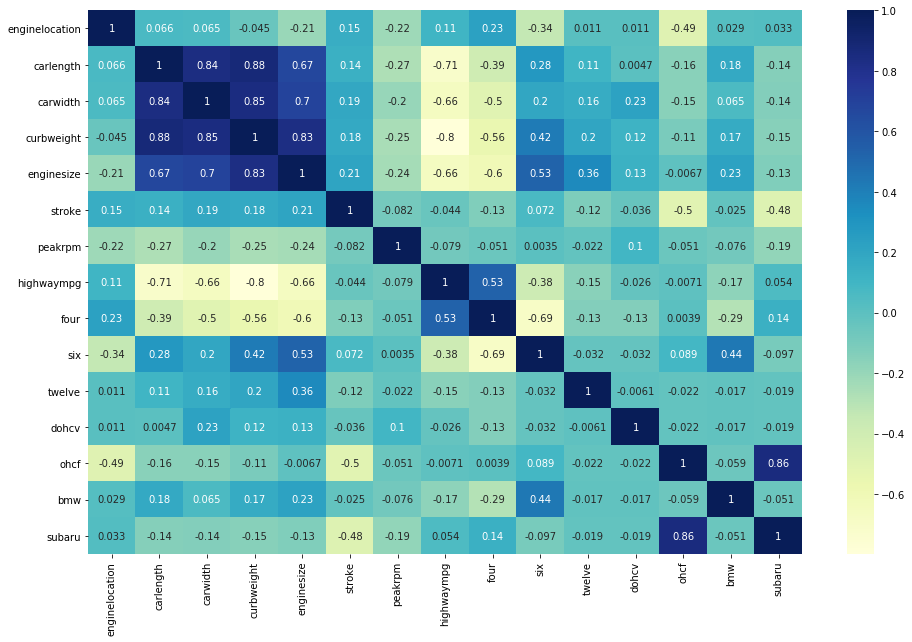

In [510]:
#Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

Following are some of the variable combinations with **strong correlation** which migh lead to multicollinearity in the model.

- carlength <-> carwidth
- carlength <-> curbweight
- carlength <-> enginesize
- carwidth <-> enginesize
- carwidth  <-> curbweight
- curbweight <-> enginesize
- ohcf <-> subaru
- carlength <-> highwaympg
- curbweight <-> highwaympg
- enginesize <-> highwaympg
- four <-> six (cylindernumber)


In [511]:
#Add a constant variable required to use statsmodel 
X_train_rfe = sm.add_constant(X_train_rfe)

#Check the X_train_rfe dataframe 
X_train_rfe.head()

,const,enginelocation,carlength,carwidth,curbweight,enginesize,stroke,peakrpm,highwaympg,four,six,twelve,dohcv,ohcf,bmw,subaru
197,1.0,1,0.711940,0.575000,0.602793,0.301887,0.514286,0.510204,0.315789,1,0,0,0,0,0,0
112,1.0,1,0.680597,0.675000,0.684251,0.343396,0.690476,0.000000,0.447368,1,0,0,0,0,0,0
95,1.0,1,0.365672,0.291667,0.209465,0.135849,0.580952,0.428571,0.552632,1,0,0,0,0,0,0
169,1.0,1,0.523881,0.441667,0.412335,0.320755,0.680952,0.265306,0.368421,1,0,0,0,0,0,0
184,1.0,1,0.456716,0.433333,0.301009,0.135849,0.633333,0.265306,0.789474,1,0,0,0,0,0,0


In [512]:
#Run the linear model from statsmodel
lm = sm.OLS(y_train,X_train_rfe).fit()

In [513]:
#Check the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     129.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.59e-76
Time:                        17:41:17   Log-Likelihood:                -1499.4
No. Observations:                 164   AIC:                             3029.
Df Residuals:                     149   BIC:                             3075.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7824.3233   1965.700      3.

As expected, the model summary warns about possibility of **multicollinearity** between the independent variables. Also the R Squared value is quite high which is also an indication of **need of reduction in number of independent variables**. 

#### Define a function to compute vif values

In [514]:
def compute_vif(vif_train_df):
    #Remove constant variable
    vif_train_df = vif_train_df.drop(['const'], axis=1)

    #Create a data frame to store vif result
    vif_df = pd.DataFrame()

    #Set the features as the variables in vif_train_df
    X = vif_train_df
    vif_df['features'] = X.columns

    #Compute VIF value for each variable
    vif_df['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    #Round of vif values
    vif_df['vif'] = round(vif_df['vif'], 2)

    #Sort the vif values
    vif_df = vif_df.sort_values(by = "vif", ascending = False)

    #Return vif_df 
    return vif_df


In [515]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = X_train_rfe)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
0,enginelocation,149.32
14,subaru,16.51
12,ohcf,16.09
3,curbweight,12.80
1,carlength,7.10
2,carwidth,6.35
4,enginesize,6.03


Out of the 15 independent variables fed into the model, **7** variables have shown high vif value i.e. **vif>=5**. 

We will now use following rule of thumb to retain/drop independent variables and rebuild model until we arrive at an optimal model.

1. Low p-Value & Low VIF - Retain
2. High p-Value & High VIF - Drop
3. High p-Value & Low VIF - Remove first before step 4
4. Low p-Value & High VIF - Remove after step 3 & rerun model as these might change after step 3.

Drop dohcv variable & build <font color = blue>**2nd**</font> model.

In [516]:
#Drop fueltype variable
X_train_lm = X_train_rfe.drop('dohcv', 1,)

#Run the linear model from statsmodel
lm_2 = sm.OLS(y_train,X_train_lm).fit()

#Check the model summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.01e-76
Time:                        17:41:18   Log-Likelihood:                -1500.7
No. Observations:                 164   AIC:                             3029.
Df Residuals:                     150   BIC:                             3073.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8268.8393   1952.817      4.

In [517]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = X_train_lm)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
0,enginelocation,147.04
13,subaru,16.21
11,ohcf,15.66
3,curbweight,12.51
1,carlength,6.45
2,carwidth,5.96
4,enginesize,5.88


The multicollineraity issue still persists. So, next we drop enginelocation variable. 

Drop enginelocation variable & build <font color = blue>**3rd**</font> model.

In [518]:
#Drop fueltype variable
X_train_lm = X_train_lm.drop('enginelocation', 1,)

#Run the linear model from statsmodel
lm_3 = sm.OLS(y_train,X_train_lm).fit()

#Check the model summary
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.01e-76
Time:                        17:41:19   Log-Likelihood:                -1500.7
No. Observations:                 164   AIC:                             3029.
Df Residuals:                     150   BIC:                             3073.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        798.7114   2277.360      0.351      0.7

In [519]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = X_train_lm)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
2,curbweight,61.67
0,carlength,52.41
1,carwidth,47.13
3,enginesize,20.94
4,stroke,20.23
6,highwaympg,10.77
7,four,10.63
10,ohcf,6.01
12,subaru,5.46
5,peakrpm,5.25


The multicollineraity issue still persists. So, next we drop curbweight variable. 

Drop curbweight variable & build <font color = blue>**4th**</font> model.

In [520]:
#Drop fueltype variable
X_train_lm = X_train_lm.drop('curbweight', 1,)

#Run the linear model from statsmodel
lm_4 = sm.OLS(y_train,X_train_lm).fit()

#Check the model summary
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     123.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.08e-71
Time:                        17:41:20   Log-Likelihood:                -1515.3
No. Observations:                 164   AIC:                             3057.
Df Residuals:                     151   BIC:                             3097.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5043.5893   2330.912      2.164      0.0

In [521]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = X_train_lm)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
1,carwidth,41.51
0,carlength,38.62
3,stroke,19.91
2,enginesize,17.83
6,four,10.49
5,highwaympg,9.59
9,ohcf,6.01
11,subaru,5.46
4,peakrpm,5.22


The carlength variable comes out to be insignificant. So, next we will drop carlength variable.

Drop carlength variable & build <font color = blue>**5th**</font> model.

In [522]:
#Drop fueltype variable
X_train_lm = X_train_lm.drop('carlength', 1,)

#Run the linear model from statsmodel
lm_5 = sm.OLS(y_train,X_train_lm).fit()

#Check the model summary
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           9.13e-73
Time:                        17:41:21   Log-Likelihood:                -1515.4
No. Observations:                 164   AIC:                             3055.
Df Residuals:                     152   BIC:                             3092.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5147.7846   2151.999      2.392      0.0

In [523]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = X_train_lm)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
2,stroke,19.85
1,enginesize,17.70
0,carwidth,16.66
4,highwaympg,8.83
5,four,8.05
8,ohcf,6.00
10,subaru,5.46
3,peakrpm,5.19


The highwaympg variable is insignificant. So, next we will drop higwaympg variable. 

Drop highwaympg variable & build <font color = blue>**6th**</font> model.

In [524]:
#Drop fueltype variable
X_train_lm = X_train_lm.drop('highwaympg', 1,)

#Run the linear model from statsmodel
lm_6 = sm.OLS(y_train,X_train_lm).fit()

#Check the model summary
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.36e-74
Time:                        17:41:22   Log-Likelihood:                -1515.5
No. Observations:                 164   AIC:                             3053.
Df Residuals:                     153   BIC:                             3087.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4447.0033   1704.150      2.610      0.0

In [525]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = X_train_lm)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
0,carwidth,16.64
1,enginesize,15.72
2,stroke,14.73
7,ohcf,5.83
4,four,5.82
9,subaru,5.45
3,peakrpm,5.19


 There is multicollinearity issue. So, next we drop carwidth variable.

Drop carwidth variable & build <font color = blue>**7th**</font> model.

In [526]:
#Drop fueltype variable
X_train_lm = X_train_lm.drop('carwidth', 1,)

#Run the linear model from statsmodel
lm_7 = sm.OLS(y_train,X_train_lm).fit()

#Check the model summary
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     123.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.07e-66
Time:                        17:41:23   Log-Likelihood:                -1538.0
No. Observations:                 164   AIC:                             3096.
Df Residuals:                     154   BIC:                             3127.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.057e+04   1667.153      6.338      0.0

In [527]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = X_train_lm)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
1,stroke,13.91
0,enginesize,7.21
3,four,5.81
6,ohcf,5.45


The peakrpm variable is insignificant. So, next we drop peakrpm variable. 

Drop peakrpm variable & build <font color = blue>**8th**</font> model.

In [528]:
#Drop fueltype variable
X_train_lm = X_train_lm.drop('peakrpm', 1,)

#Run the linear model from statsmodel
lm_8 = sm.OLS(y_train,X_train_lm).fit()

#Check the model summary
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     136.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.34e-66
Time:                        17:41:24   Log-Likelihood:                -1540.0
No. Observations:                 164   AIC:                             3098.
Df Residuals:                     155   BIC:                             3126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.244e+04   1375.293      9.046      0.0

In [529]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = X_train_lm)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif
1,stroke,11.25
0,enginesize,7.01
2,four,5.49
5,ohcf,5.02


All the variables are significant. However, stroke variable is causing multicollinearity issue. So, next we drop stroke variable. 

Drop stroke variable & build <font color = blue>**9th**</font> model.

In [530]:
#Drop fueltype variable
X_train_lm = X_train_lm.drop('stroke', 1,)

#Run the linear model from statsmodel
lm_9 = sm.OLS(y_train,X_train_lm).fit()

#Check the model summary
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.80e-64
Time:                        17:41:25   Log-Likelihood:                -1547.4
No. Observations:                 164   AIC:                             3111.
Df Residuals:                     156   BIC:                             3136.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8722.4401   1017.396      8.573      0.0

In [531]:
#Compute vif values to find correlated variables
vif_df = compute_vif(vif_train_df = X_train_lm)

#Check variables with multicollinearity problem
vif_df[vif_df['vif']>=5]

,features,vif


We have now reached a stage where there is **no multicollinearity** between the independent variables and all the independent variables are **significant**. 

All the independdent variables together explain about **86%** of variation in dependent variable. Thus we can consider this as out final model given that the model residuals do not violate any assumptions of linear regression.

In [532]:
#Check the vif of the remaining independent variables
vif_df

,features,vif
4,ohcf,4.81
6,subaru,4.69
0,enginesize,3.61
2,six,2.72
1,four,2.28
5,bmw,1.35
3,twelve,1.24


#### Step6: Residual analysis & model interpretation

#### Check if the residuals of train data are normally distributed.

In [533]:
#Predict use the 9th model
y_train_price = lm_9.predict(X_train_lm)

#Compute the residuals
residuals = y_train - y_train_price

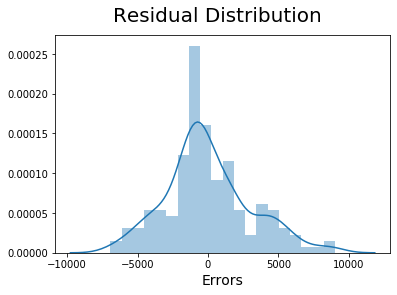

In [534]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residuals), bins = 20)
fig.suptitle('Residual Distribution', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 14)                         # X-label
plt.show()

In [535]:
#Check if mean of residuals is close to zero
np.mean(residuals)

5.268414431001718e-13

The distribution of residuals does look similiar to a **normal distribution with mean close to zero**.

#### Check if residuals have constant variance - Homoscedastic

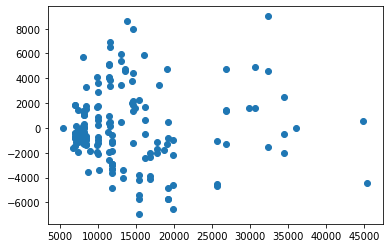

In [536]:
#Plot a scatter plot to check for constant variance
plt.scatter(y_train_price,residuals)
plt.show()

The variance appears to be fairly constant **without any obvious pattern** in it.

#### Check if residuals are independent - No Autocorrelation

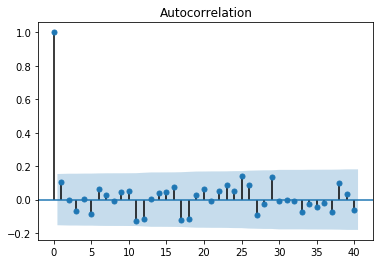

In [537]:
acf = smt.graphics.plot_acf(residuals, lags= 40, alpha = 0.05)
acf.show()

None of the lags cross the significance threshold. Thus, the residuals appear to be **independent**.

Since none of the assumptions of linear regression is violated, we are now confident that the **model fit isn't by chance** and has **decent predictive power**. The normality of residual terms allows us to draw some inference on the coefficients.

**Model Interpretation**: Lets relook into the model summary to intepret the variables and overall model. 

In [538]:
#View final model summary
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.80e-64
Time:                        17:41:31   Log-Likelihood:                -1547.4
No. Observations:                 164   AIC:                             3111.
Df Residuals:                     156   BIC:                             3136.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8722.4401   1017.396      8.573      0.0

**p-value** : The p-value for all the independent variables is **<0.05** every variable we shortlisted is a meaningful addition to our model because changes in the predictor's value are related to changes in the response variable. It's not by chance.

**F-statistic**: Looking at the prob(F-statistic) we can say that our regression model predicts the response variable better than the mean of the response i.e. The fit of the intercept-only model and your model are unequal.

**Estimated Parameters**: 

- Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant.

- Variables with negative coefficients would decrese the price of the car by thier respective estimation given that all other variables are held constant (one at a time) and vice versa. 

**Adjusted R-squared**: The value of 0.858 indicates that with given set of independent variables we are able to explain about 86% of the variation in the prices of the car.

Thus the final model equation:
<font color =blue>
$ Price = 8722.44 + 39349.49 \times enginesize -5965.56 \times four -7333.77 \times six -12071.93 \times twelve + 13390.34 \times ohcf + 8948.60 \times bmw -14723.59 \times subaru $
</font>


#### Step 7: Making predictions on test data

#### Applying the scaling on the test sets

In [539]:
#Apply scaling to scaling variables within test data
scaling_variables = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke',
                     'compressionratio','horsepower','peakrpm','citympg','highwaympg']

#Transform the scaling variables
test_df[scaling_variables] = scaler.transform(test_df[scaling_variables])

#Check the scaling made
test_df.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
88,0,0,1,0,1,0.282799,0.467164,0.425000,0.316667,0.354926,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,1,1,0.291545,0.585075,0.850000,0.250000,0.852211,...,0,0,0,0,0,0,0,0,0,0
114,1,1,1,1,1,0.804665,0.862687,0.675000,0.908333,0.774631,...,0,1,0,0,0,0,0,0,0,0
158,1,0,1,0,1,0.265306,0.376119,0.341667,0.433333,0.305275,...,0,0,0,0,0,0,0,1,0,0
163,0,0,0,1,1,0.230321,0.411940,0.308333,0.400000,0.264158,...,0,0,0,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [540]:
#Create y_test and X_test
y_test = test_df.pop('price')
X_test = test_df

In [541]:
#Add constant variable to test dataframe to test 9th model (final model)
X_test = sm.add_constant(X_test,has_constant='add')

In [542]:
#Retain only relevant variables in test set as per final model
X_test = X_test[list(X_train_lm.columns)]

In [543]:
#Check the variables retained in test data
X_test.columns

Index(['const', 'enginesize', 'four', 'six', 'twelve', 'ohcf', 'bmw',
       'subaru'],
      dtype='object')

#### Make predictions using final model (model #9)

In [544]:
#Make predictions
y_predicted = lm_9.predict(X_test)

Now that we have completed the predictions on test data, we can proceed to evaluate the model.

#### Step 8: Model Evaluation

#### Visualise actual vs predicted values in test data

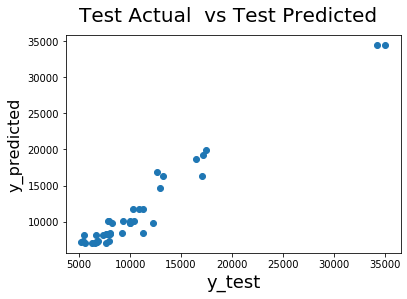

In [545]:
#Plot y_test and y_predicted
fig = plt.figure()
plt.scatter(y_test, y_predicted)
fig.suptitle('Test Actual  vs Test Predicted', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                                        # X-label
plt.ylabel('y_predicted', fontsize = 16)
plt.show()

From the above plot it is evident that our data scattered symmetrically about a 45 degree diagonal. This is an indication that out model is able to make good predictions on unseen test data as well. 

In [546]:
#Create dataframe from actual Vs predicted values to compare
result = {'test_actual':y_test,'test_predicted': y_predicted}
result_df = pd.DataFrame(result)

#Sort the data frame
result_df.sort_values(['test_actual'], axis=0, ascending=True, inplace=True)

#Derive error column
result_df['error'] = result_df['test_actual'] - result_df['test_predicted']

#View prediction dataframe
result_df.head(10)

,test_actual,test_predicted,error
50,5195.0,7211.533176,-2016.533176
150,5348.0,7360.021809,-2012.021809
89,5499.0,8102.464978,-2603.464978
21,5572.0,7063.044542,-1491.044542
19,6295.0,7063.044542,-768.044542
20,6575.0,7063.044542,-488.044542
91,6649.0,8102.464978,-1453.464978
53,6695.0,7211.533176,-516.533176
52,6795.0,7211.533176,-416.533176
31,6855.0,7360.021809,-505.021809


#### Check R squared on test data

Any prediction model needs to be generalised enough to make good predictions on unseen data as well. Lets llok into the Rsquared for the predictions made on the test data  for our final model.

In [547]:
#Import the r2_score function from metrics module of sklearn package
from sklearn.metrics import r2_score

#Check the r2_score on test data
r2_score(y_test, y_predicted)

0.9384310492412035

We are able to explain about 94% of variation in the test data using the independent variables we shortlisted in our model and make good predictions. 

#### Step 9: Summarising driving factors for pricing dynamics

<font color =blue> **3 key factors**</font> on which the pricing dynamics of car depends in american market are as follows:

1. <font color =blue>**Number of cylinders placed in the car**.</font>
2. <font color =blue>**Size of car from engine perspective**.</font>
3. <font color =blue>**Type of engine used in the car**.</font>

In order to **manipulate the design of the cars**, formulate the **business strategy** and make informed **business decision** related to pricing their cars in american market the company should look at the following competitors:

1. <font color =blue> **BMW**</font> - To formulate pricing & strategy for cars to be **priced on higher side**.
2. <font color =blue> **Subaru**</font> - To formulate pricing & strategy for cars to be **priced on lower side**.

**Inferences from Model**:

1. As number of cylinders increase price decreases linearly <font color =blue> **(negative correlation)**</font>.
2. As engine size increases price increases linearly <font color =blue> **(positive correlation)**</font>.
3. With increase in engine size car is expected to have <font color =blue>**higher width & length**, **more horsepower** and **better curbweight**.</font>
4. Engine type should be preferrably be <font color =blue> **'ohcv'**</font> for higher priced cars.
